<a href="https://colab.research.google.com/github/param2070/SpitMLLabtest/blob/main/lab2minores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
from matplotlib.pyplot import figure as fig

In [3]:
df = pd.read_csv('horse.csv')

In [4]:
df1 = df.copy()
print(df1.to_string())


    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time          pain  peristalsis abdominal_distention nasogastric_tube nasogastric_reflux  nasogastric_reflux_ph rectal_exam_feces        abdomen  packed_cell_volume  total_protein abdomo_appearance  abdomo_protein     outcome surgical_lesion  lesion_1  lesion_2  lesion_3 cp_data
0        no  adult           530101         38.5   66.0              28.0                cool          reduced             NaN            more_3_sec  extreme_pain       absent               severe              NaN                NaN                    NaN         decreased  distend_large                45.0            8.4               NaN             NaN        died              no     11300         0         0      no
1       yes  adult           534817         39.2   88.0              20.0                 NaN              NaN   pale_cyanotic            less_3_sec    

In [5]:
df1.nunique()

surgery                    2
age                        2
hospital_number          283
rectal_temp               40
pulse                     52
respiratory_rate          40
temp_of_extremities        4
peripheral_pulse           4
mucous_membrane            6
capillary_refill_time      3
pain                       5
peristalsis                4
abdominal_distention       4
nasogastric_tube           3
nasogastric_reflux         3
nasogastric_reflux_ph     20
rectal_exam_feces          4
abdomen                    5
packed_cell_volume        50
total_protein             80
abdomo_appearance          3
abdomo_protein            37
outcome                    3
surgical_lesion            2
lesion_1                  61
lesion_2                   6
lesion_3                   2
cp_data                    2
dtype: int64

In [6]:
df1.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
df1 = df1.drop(columns=["hospital_number", "nasogastric_tube", "nasogastric_reflux", "nasogastric_reflux_ph", "rectal_exam_feces", "abdomen", "abdomo_appearance", "abdomo_protein"])

df1 = df1.drop(columns=["lesion_1", "lesion_2", "lesion_3", "cp_data"])

In [8]:
print(df1.to_string())

    surgery    age  rectal_temp  pulse  respiratory_rate temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time          pain  peristalsis abdominal_distention  packed_cell_volume  total_protein     outcome surgical_lesion
0        no  adult         38.5   66.0              28.0                cool          reduced             NaN            more_3_sec  extreme_pain       absent               severe                45.0            8.4        died              no
1       yes  adult         39.2   88.0              20.0                 NaN              NaN   pale_cyanotic            less_3_sec     mild_pain       absent               slight                50.0           85.0  euthanized              no
2        no  adult         38.3   40.0              24.0              normal           normal       pale_pink            less_3_sec     mild_pain   hypomotile                 none                33.0            6.7       lived              no
3       yes  young         3

In [9]:
df1.nunique()

surgery                   2
age                       2
rectal_temp              40
pulse                    52
respiratory_rate         40
temp_of_extremities       4
peripheral_pulse          4
mucous_membrane           6
capillary_refill_time     3
pain                      5
peristalsis               4
abdominal_distention      4
packed_cell_volume       50
total_protein            80
outcome                   3
surgical_lesion           2
dtype: int64

In [11]:
df1['age'].replace(['young', 'adult'], [1, 2], inplace=True)
df1['surgery'].replace(['yes', 'no'], [1, 2], inplace=True)
df1['temp_of_extremities'].replace(['normal', 'warm', 'cool', 'cold'], [1, 2, 3, 4], inplace=True)
df1['peripheral_pulse'].replace(['normal', 'increased', 'reduced', 'absent'], [1, 2, 3, 4], inplace=True)
df1['mucous_membrane'].replace(['normal_pink', 'bright_pink', 'pale_pink', 'pale_cyanotic', 'bright_red', 'dark_cyanotic'], [1, 2, 3, 4, 5, 6], inplace=True)
df1['capillary_refill_time'].replace(['less_3_sec', 'more_3_sec', 3], [1, 2, 2], inplace=True)
df1['pain'].replace(['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain'], [1, 2, 3, 4, 5], inplace=True)
df1['peristalsis'].replace(['hypermotile', 'normal', 'hypomotile', 'absent'], [1, 2, 3, 4], inplace=True)
df1['abdominal_distention'].replace(['none', 'slight', 'moderate', 'severe'], [1, 2, 3, 4], inplace=True)
df1['outcome'].replace(['lived', 'died', 'euthanized'], [1, 2, 3], inplace=True)
df1['surgical_lesion'].replace(['yes', 'no'], [1, 2], inplace=True)

In [12]:
print(df['capillary_refill_time'].value_counts())

less_3_sec    187
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64


In [13]:
df1['rectal_temp'] = df1['rectal_temp'].fillna(df1['rectal_temp'].mean())
df1['pulse'] = df1['pulse'].fillna(round(df1['pulse'].mean()))
df1['respiratory_rate'] = df1['respiratory_rate'].fillna(round(df1['respiratory_rate'].mean()))
df1['temp_of_extremities'] = df1['temp_of_extremities'].fillna(round(df1['temp_of_extremities'].mean()))
df1['peripheral_pulse'] = df1['peripheral_pulse'].fillna(round(df1['peripheral_pulse'].mean()))
df1['mucous_membrane'] = df1['mucous_membrane'].fillna(round(df1['mucous_membrane'].mean()))
df1['capillary_refill_time'] = df1['capillary_refill_time'].fillna(1)
df1['pain'] = df1['pain'].fillna(round(df1['pain'].mean()))
df1['peristalsis'] = df1['peristalsis'].fillna(round(df1['peristalsis'].mean()))
df1['abdominal_distention'] = df1['abdominal_distention'].fillna(round(df1['abdominal_distention'].mean()))
df1['packed_cell_volume'] = df1['packed_cell_volume'].fillna(round(df1['packed_cell_volume'].mean()))
df1['total_protein'] = df1['total_protein'].fillna(round(df1['total_protein'].mean()))


In [14]:
print(df1.to_string())

     surgery  age  rectal_temp  pulse  respiratory_rate  temp_of_extremities  peripheral_pulse  mucous_membrane capillary_refill_time  pain  peristalsis  abdominal_distention  packed_cell_volume  total_protein  outcome  surgical_lesion
0          2    2    38.500000   66.0              28.0                  3.0               3.0              3.0                     2   5.0          4.0                   4.0                45.0            8.4        2                2
1          1    2    39.200000   88.0              20.0                  2.0               2.0              4.0                     1   3.0          4.0                   2.0                50.0           85.0        3                2
2          2    2    38.300000   40.0              24.0                  1.0               1.0              3.0                     1   3.0          3.0                   1.0                33.0            6.7        1                2
3          1    1    39.100000  164.0              84.0 

In [15]:
df1.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
dtype: int64

In [16]:
x = df1[['age', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
         'capillary_refill_time', 'total_protein', 'pain', 'peristalsis', 'abdominal_distention', 'packed_cell_volume']]
y = df1['outcome']

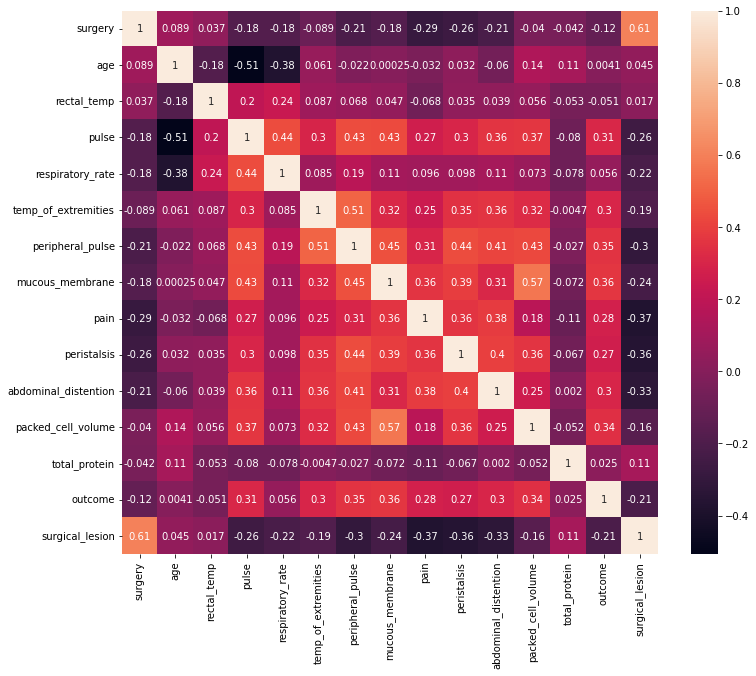

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape
df1.outcome.describe()
(df1.outcome == 0).sum()
#sns.pairplot(df1[['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
#         'capillary_refill_time', 'total_protein', 'pain', 'peristalsis', 'abdominal_distention', 'packed_cell_volume']].corr())

plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [18]:
y_test

206    2
188    1
12     1
219    3
237    3
136    1
228    1
205    1
52     1
108    3
240    1
15     2
184    1
246    2
22     1
74     2
269    2
90     1
227    3
255    3
190    1
103    1
124    3
129    1
220    1
116    1
194    1
285    3
294    3
249    3
92     1
66     1
8      3
122    1
217    3
150    2
176    2
182    1
298    3
5      1
263    1
89     1
81     1
34     1
55     2
139    1
234    2
64     1
7      2
45     2
73     2
291    2
173    2
106    1
59     2
230    2
168    3
26     1
283    1
153    1
Name: outcome, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(x_train, y_train)
clf.predict(x_test)
clf.score(x_test, y_test)


0.6333333333333333